In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\Dell\Downloads\archive (3).zip")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data_dup=df.duplicated().any()

In [6]:
data_dup

True

In [7]:
df=df.drop_duplicates()

In [8]:
data_dup=df.duplicated().any()

In [9]:
data_dup

False

In [10]:
cateval=[]
conval=[]

for column in df.columns:
    if df[column].nunique()<=10:
        cateval.append(column)
    else:
        conval.append(column)


In [11]:
cateval

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [12]:
conval

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [13]:
cateval.remove('sex')
cateval.remove('target')
df=pd.get_dummies(df,columns=cateval,drop_first=True)

In [14]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
st=StandardScaler()
df[conval]=st.fit_transform(df[conval])

In [17]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [18]:
x=df.drop('target',axis=1)

In [19]:
y=df['target']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [22]:
x_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
245,-1.153610,1,-0.091401,-0.532247,1.680713,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
349,0.839089,0,-0.091401,0.319348,-2.299069,0.135360,False,True,False,False,...,False,True,False,True,False,False,False,False,False,True
135,0.396267,0,2.189843,-0.416120,-0.156110,1.515232,False,False,False,True,...,True,True,False,False,True,False,False,True,False,False
389,0.949794,1,0.764066,-0.261285,0.018826,1.084022,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
66,-0.157260,1,-0.091401,-0.958045,0.106294,0.135360,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,-1.375021,0,-1.688272,0.358057,-1.205722,-0.382092,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
20,0.617678,1,0.478910,-1.190298,0.237495,1.687716,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
177,1.060500,1,-0.661712,-0.009677,-2.342803,0.997780,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
90,-0.046555,0,-1.346085,0.396766,0.762302,-0.899544,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [23]:
x_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
151,-0.046555,1,3.444528,0.706437,1.986850,-0.899544,True,False,False,False,...,False,False,True,True,False,False,False,False,False,True
78,-0.267966,1,0.136724,-0.880627,0.368697,-0.209608,True,False,False,False,...,False,False,True,True,False,False,False,False,True,False
16,-0.378671,0,0.478910,1.190298,-0.331045,0.394086,False,True,False,False,...,False,False,True,True,False,False,False,False,True,False
10,1.835438,0,-1.117961,-1.887058,-1.074521,0.480328,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
215,-0.600082,1,-0.091401,0.377412,0.937237,-0.382092,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.392616,1,-0.661712,-0.183867,-3.436149,-0.037124,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
77,0.949794,1,0.478910,-1.151589,-0.243577,2.550136,False,False,False,False,...,True,False,True,False,True,False,False,False,False,True
125,0.617678,0,1.049221,-0.125804,0.937237,-0.123366,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
522,1.392616,0,1.163283,0.590310,0.980971,-0.899544,False,True,False,False,...,False,False,True,True,False,False,False,False,True,False


# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [26]:
y_pred1=log.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test,y_pred1)

0.8461538461538461

# SVM

In [29]:
from sklearn import svm

In [30]:
svm = svm.SVC()

In [31]:
svm.fit(x_train,y_train)

SVC()

In [32]:
y_pred2=svm.predict(x_test)

In [33]:
accuracy_score(y_test,y_pred2)

0.8021978021978022

# KNeighbors Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn=KNeighborsClassifier()

In [36]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [37]:
y_pred3=knn.predict(x_test)

In [38]:
accuracy_score(y_test,y_pred3)

0.7912087912087912

In [39]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    score.append(accuracy_score(y_test,y_pred))

In [40]:
score

[0.6813186813186813,
 0.7912087912087912,
 0.7252747252747253,
 0.7802197802197802,
 0.7912087912087912,
 0.8021978021978022,
 0.7802197802197802,
 0.8021978021978022,
 0.8021978021978022,
 0.7802197802197802,
 0.7912087912087912,
 0.7802197802197802,
 0.7912087912087912,
 0.7912087912087912,
 0.7912087912087912,
 0.7912087912087912,
 0.7582417582417582,
 0.7802197802197802,
 0.7582417582417582,
 0.7802197802197802,
 0.7692307692307693,
 0.7692307692307693,
 0.7582417582417582,
 0.7802197802197802,
 0.7692307692307693,
 0.7802197802197802,
 0.7692307692307693,
 0.7912087912087912,
 0.7802197802197802,
 0.7912087912087912,
 0.7912087912087912,
 0.7912087912087912,
 0.7802197802197802,
 0.7912087912087912,
 0.7912087912087912,
 0.7912087912087912,
 0.7802197802197802,
 0.7802197802197802,
 0.7692307692307693]

In [41]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)
y_pred3=knn.predict(x_test)
accuracy_score(y_test,y_pred3)

0.8021978021978022

# Non-Linear ML Algorithms

In [42]:
df1=pd.read_csv(r"C:\Users\Dell\Downloads\archive (3).zip")

In [43]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [44]:
df1=df1.drop_duplicates()

In [45]:
df1.shape

(302, 14)

In [46]:
x=df1.drop('target',axis=1)
y=df1['target']

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt=DecisionTreeClassifier()

In [50]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred4=dt.predict(x_test)

In [52]:
accuracy_score(y_test,y_pred4)

0.7362637362637363

# Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf=RandomForestClassifier()

In [55]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
y_pred5=rf.predict(x_test)

In [57]:
accuracy_score(y_test,y_pred5)

0.8351648351648352

In [58]:
import seaborn as sns

In [59]:
final_data=pd.DataFrame({"Models":["LR","SVM","KNN","DT","RFC"],
                        "ACC":[accuracy_score(y_test,y_pred1),
                               accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4),
                              accuracy_score(y_test,y_pred5)]})

<Axes: xlabel='Models', ylabel='ACC'>

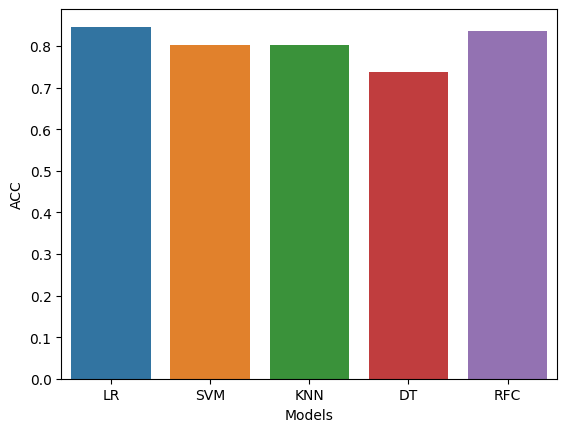

In [60]:
sns.barplot(x=final_data["Models"],y=final_data["ACC"])

In [78]:
x1=df1.drop('target',axis=1)

In [79]:
y1=df1['target']

In [80]:
x1.shape

(302, 13)

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
lr=LogisticRegression()

In [83]:
lr.fit(x1,y1)

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Prediction on New Data

In [85]:
import pandas as pd

In [86]:
new_data=pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3
},index=[0])

In [87]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [88]:
lr.predict(new_data)

array([0], dtype=int64)

# Save Model Using Joblib

In [89]:
import  joblib

In [90]:
joblib.dump(lr,'model_joblib_heart')

['model_joblib_heart']

In [91]:
model=joblib.load('model_joblib_heart')

In [92]:
model.predict(new_data)

array([0], dtype=int64)